In [1]:
%%bash
# Extract raw data
tar -zxf ../raw_data/20181128.tar.gz -C ../raw_data

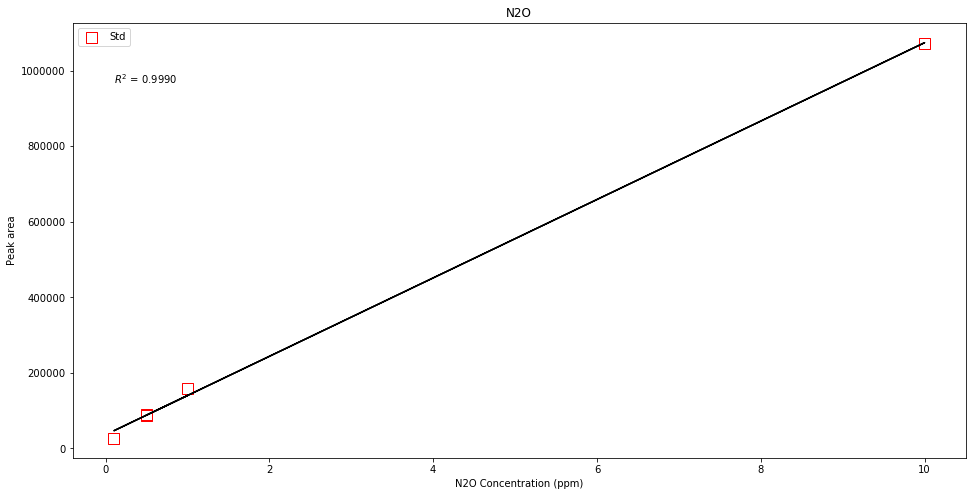

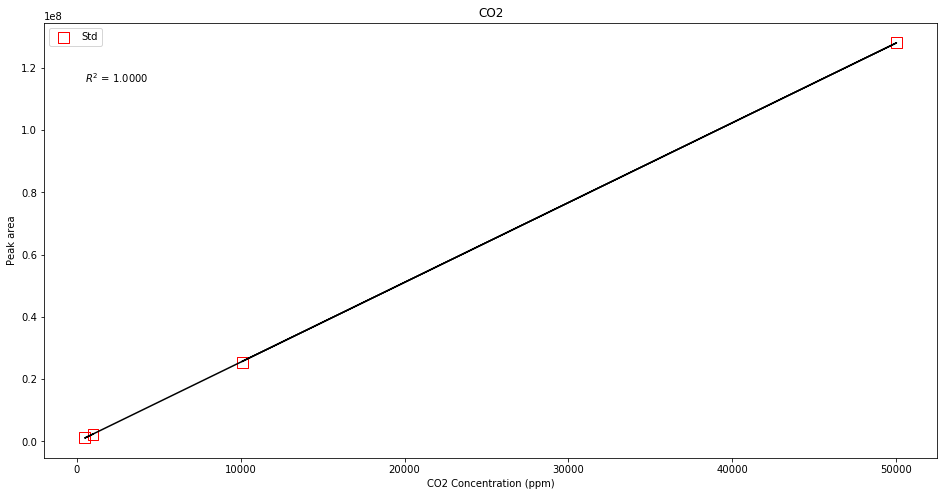

In [2]:
%matplotlib inline

# Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Import user-defined module with regression and plotting functions
from src.calibrate import *

# Import the csv data as a dataframe
df = pd.read_csv("../raw_data/20181128/GC_run_20181128.csv")
N2Ostd  = df[df['Sample_name'].str.contains("N2OStd")].copy()
CO2std  = df[df['Sample_name'].str.contains("CO2Std")].copy()
samples = df[df['Sample_name'].str.contains("NT")].copy()

# Convert the data types to numeric
CO2std_x = CO2std.loc[:,"CO2_conc"].astype(float)
CO2std_y = CO2std.loc[:,"CO2_peak"].astype(float)
N2Ostd_x = N2Ostd.loc[:,"N2O_conc"].astype(float)
N2Ostd_y = N2Ostd.loc[:,"N2O_peak"].astype(float)
CH4std_x = pd.DataFrame({})
CH4std_y = pd.DataFrame({})

N2Osam = samples.loc[:,"N2O_peak"].astype(float)
CO2sam = samples.loc[:,"CO2_peak"].astype(float)

# Plot the standards with linear regression trendline
plot_standards(N2Ostd_x,N2Ostd_y,"N2O")
plot_standards(CO2std_x,CO2std_y,"CO2")

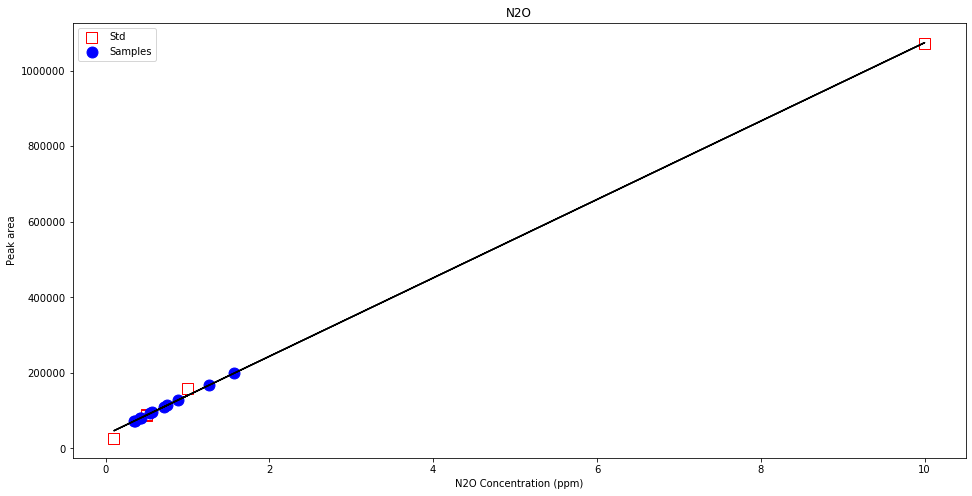

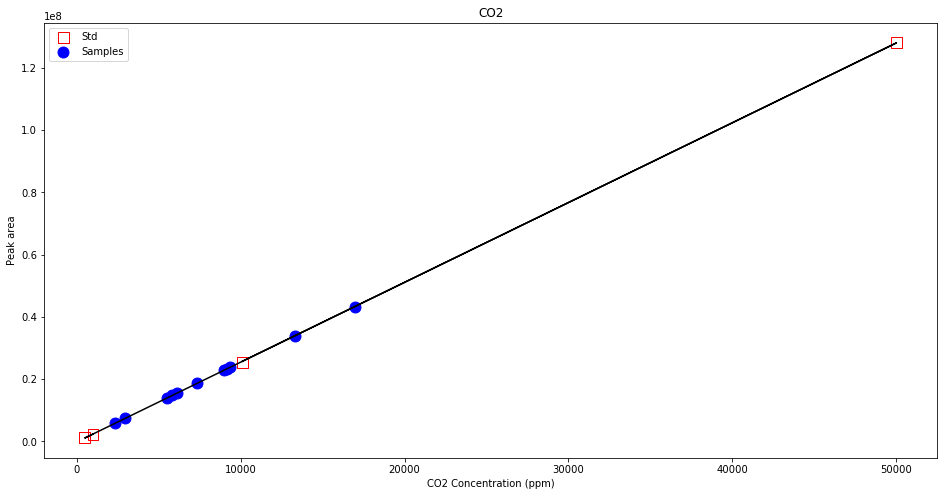

In [3]:
# Now, plot the standards along with the samples
plot_samples(N2Osam, N2Ostd_x, N2Ostd_y, "N2O")
plot_samples(CO2sam, CO2std_x, CO2std_y, "CO2")

In [4]:
# Since the data look good, export the sample concentrations to a text file
saveoutput = save_sampleconc(N2Ostd_x, N2Ostd_y, CO2std_x, CO2std_y, 
                             CH4std_x, CH4std_y, samples, 
                             "../processed_data/RVT_TracerTest_GasConcentrations_20181128.txt", write_to_datafile=True)
print(saveoutput)

    vial location  depth       date method    dup  N2O_conc  N2O_bdl  \
5      0     NTT1  150.0 2018-08-30      G  False  1.565076    False   
6      0     NTT1  120.0 2018-08-30      G  False  1.260544    False   
7      0     NTT1   90.0 2018-08-30      G  False  0.434696    False   
8      0     NTT1   90.0 2018-08-30      G   True  0.420514    False   
9      0     NTT1   60.0 2018-08-30      G  False  0.571114    False   
10     0     NTT1   30.0 2018-08-30      G  False  0.355571    False   
11     0     NTC1  140.0 2018-08-30      G  False  0.885019    False   
12     0     NTC1  110.0 2018-08-30      G  False  0.752282    False   
13     0     NTC1   80.0 2018-08-30      G  False  0.715508    False   
14     0     NTC1   50.0 2018-08-30      G  False  0.546402    False   
15     0     NTC1   20.0 2018-08-30      G  False  0.349589    False   

        CO2_conc  CO2_bdl  CH4_conc  CH4_bdl  
5   16949.905754    False       NaN      NaN  
6   13306.997138    False       NaN      